<a href="https://colab.research.google.com/github/mamoor2019/AI/blob/main/EndToEndMachineLearning_CapstoneProject_Mamoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GitHub Link**

https://github.com/mamoor2019/AI/blob/main/EndToEndMachineLearning_CapstoneProject_Mamoor.ipynb

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

*   Exploratory Data Analysis
*   Understanding what type content is available in different countries

*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features






# **Dataset Description**

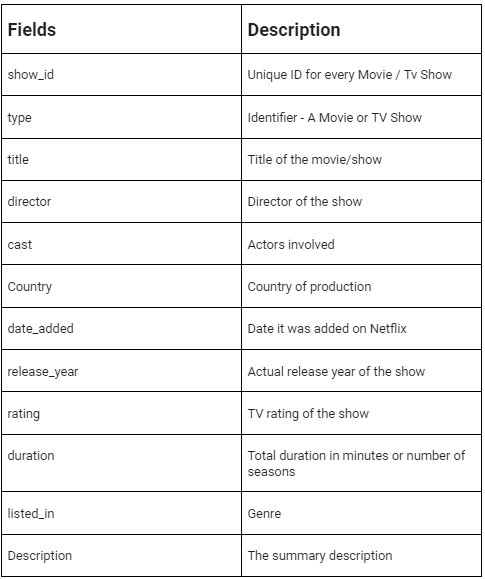

# **Understanding the Dataset**

In [94]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [95]:
#mounting the google drive to access the data set
from google.colab import drive
drive.mount('/content/drive')
#Loading the dataset
df_orig = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
# copying the data frame
df=df_orig.copy();

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# checking first 5 rows of the dataset
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [97]:
# checking last 5 rows
df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [98]:
# shape of the dataframe
df.shape

(8807, 12)

In [99]:
# Columns information
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

There are 8807 rows and 12 columns in the data set

In [100]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There is only one numerical value i.e **release_year** in the dataset, rest all attributes are of string type.

# **Data Processing**

In this section will do the following actions on the data:


1.   Find duplicate data rows.
2.   Handling null values.
3.   Droping unwanted columns.



**Duplciate Data Handling**

In [101]:
# duplciate values
df[df.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

There are no duplciate data in this data set.

**Handling Null values**

<Axes: >

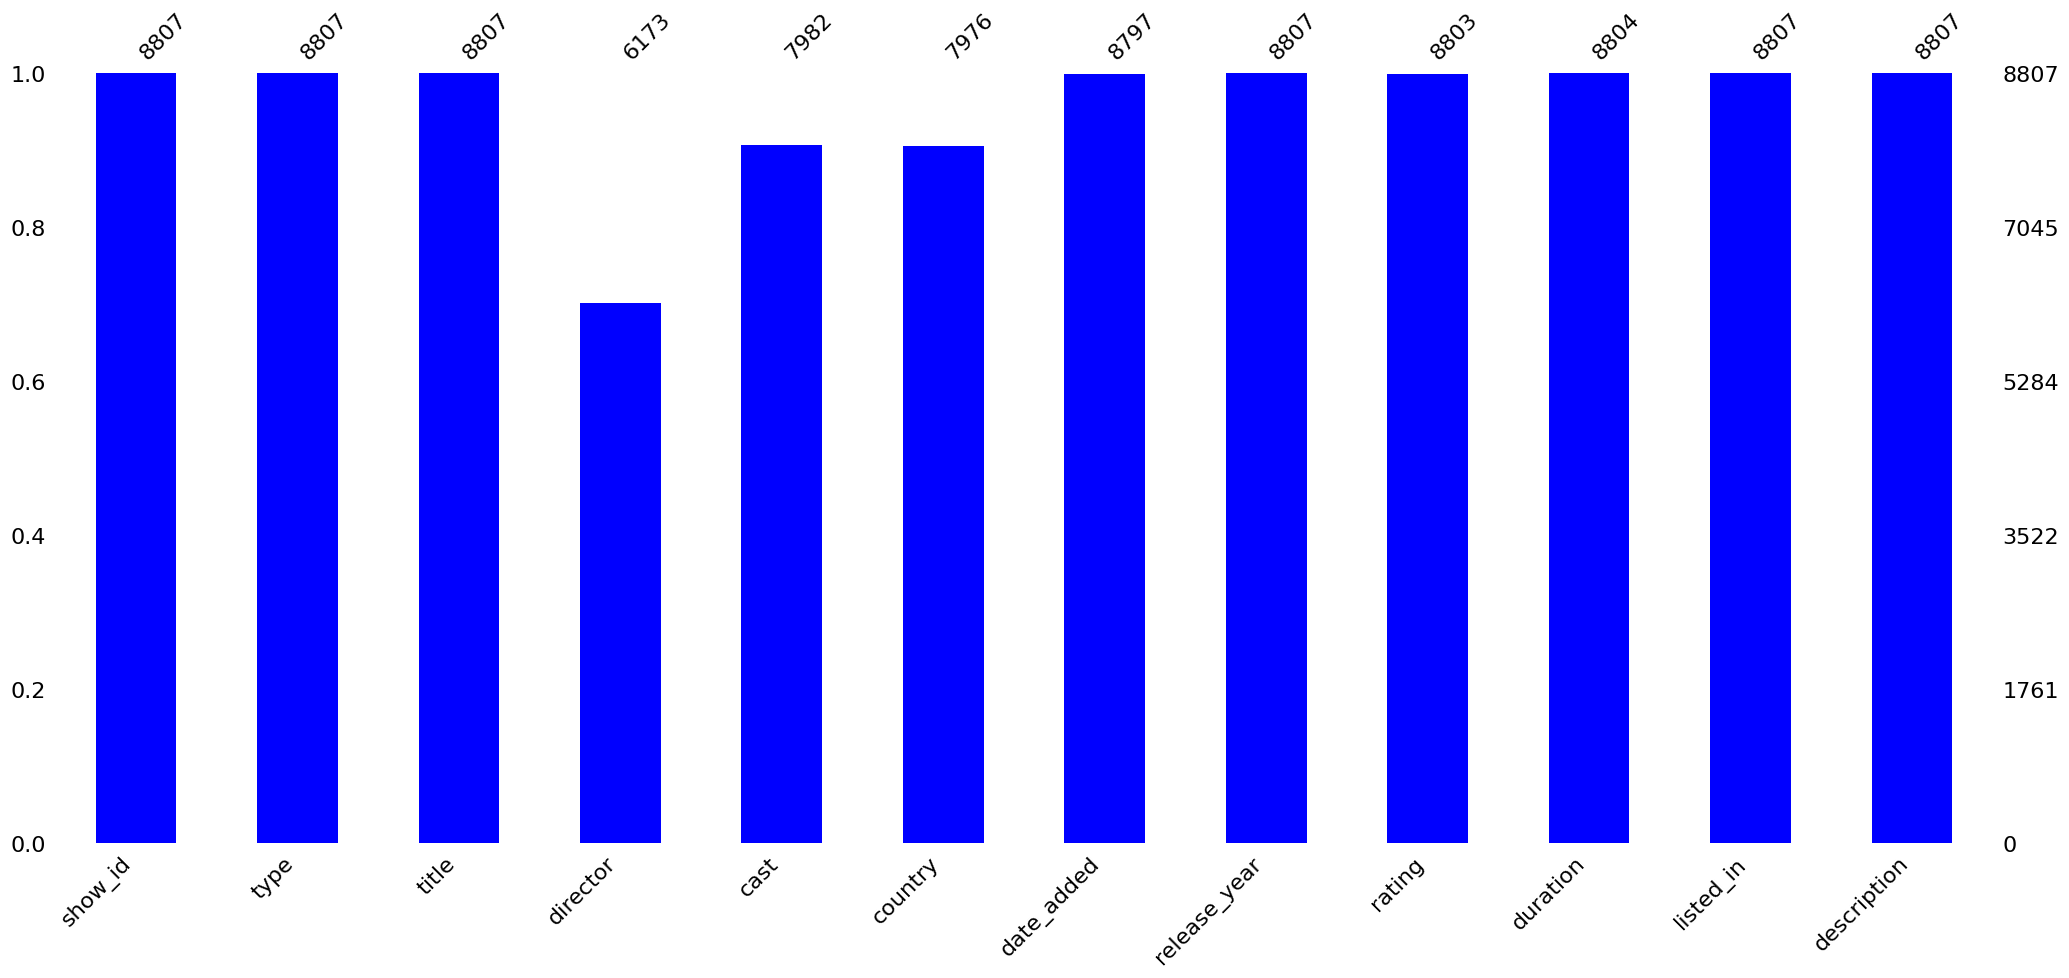

In [102]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color = 'blue')

Above bar chart shows the distribution of null values in the given data set. For most of the attribute there is no missing values except for director,cast,country, date_added , rating and duration.

These data also can be verified through below code.

In [103]:
# null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [104]:
# total number of null values
df.isnull().sum().sum()

4307

There are total 4307 total number of null values in the data set. The column director is having highest null value of 2634.

For the cast cloumn will replace the missing value with 'No cast' and for the country column will replace the missing value with the most frequent value in that column.

Dropping the date_added and rating for the analysis.

In [105]:
# replacing missing cast value with No cast
df['cast'].fillna(value='No cast',inplace=True)
# replacing missing country value with most frequent value
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
# replacing missing director field with empty string
df['director'].fillna('', inplace=True)
# replacing missing duration value with most frequent value
df['duration'].fillna(value=df['duration'].mode()[0],inplace=True)

In [106]:
# dropping date_added and rating column
df.dropna(subset=['date_added','rating'],inplace=True)

In [107]:
# checking null value after clean up
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

we can see that all null values are handled, and the data is clean and ready for further exploration.

# **In-depth Exploratory Data Analysis(EDA)**

**Chart 1**: Count plot for show type

Countplot is a type of bar plot that shows the frequency of each categorical value in a dataset. HereIe I have applied countplot to type variable.

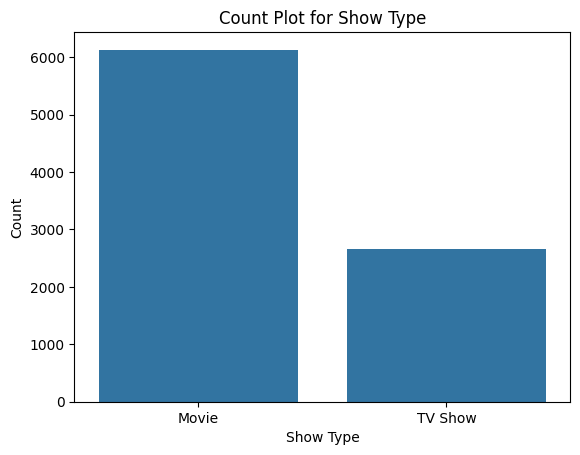

In [108]:
# sns count plot for type
sns.countplot(df,x='type')
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.title('Count Plot for Show Type')
plt.show()

From the above plot it can be seen that there is more number of Movie show than TV show. Roughly Movie shows are twice than TV show.

**Chart 2:**  TV and Movie show ratings

In [109]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8793, dtype: object

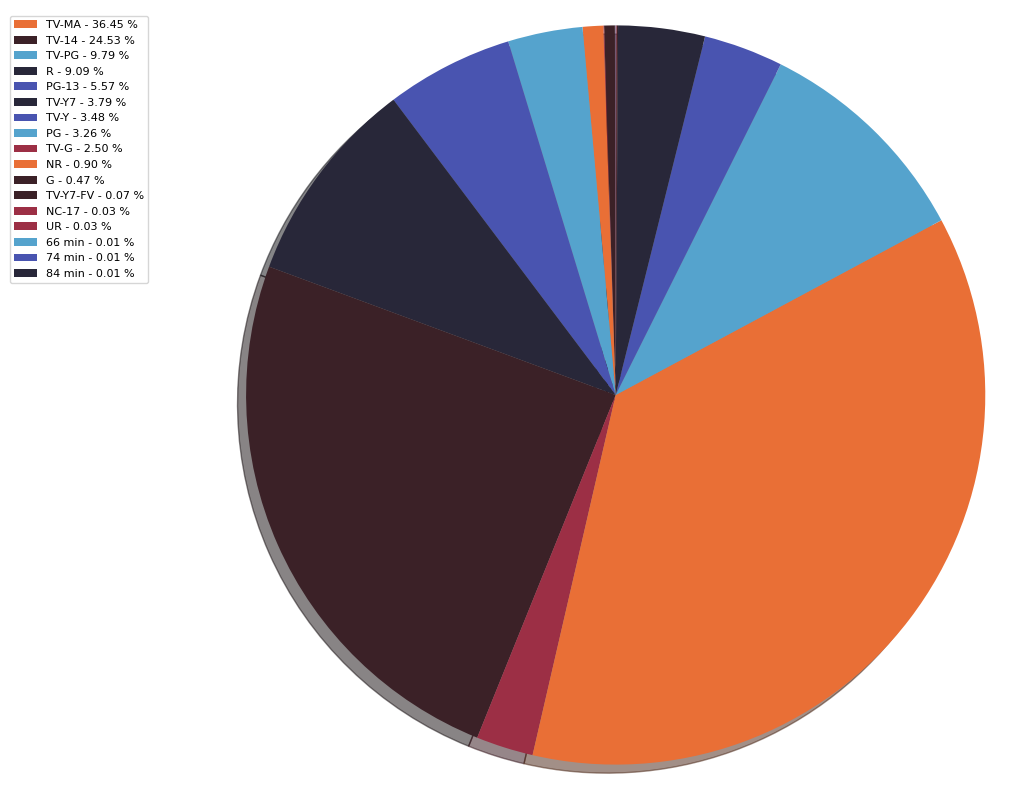

In [110]:
df_pie = df.groupby(['rating'])['show_id'].count().reset_index()
x = np.char.array(list(df_pie['rating'].values)) # creates a numpy array of strings x from the rating
y = np.array(df_pie['show_id'].values) # creates a numpy array y from the show_id column of the df_pie
colors = sns.color_palette('icefire')[0:14]#selecting 14 colors because we have 14 different categories
porcent = 100.*y/y.sum()
plt.figure(figsize = (10, 10))
#draw pie chart
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow= True)
# labels for the plot
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
sort_legend = True
#sort the labels
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

plt.show()

The above pie chart shows that:
1. Most of the rated content on Netflix falls into the TV-MA and TV-14 categories.
2.The high share of TV-MA and TV-14-rated content suggests a significant audience for mature and teen-oriented content.

**Chart 3**: Histogram to visualize the distribution of the release year of movies and shows grouped by their type

Text(0.5, 9.444444444444438, 'Release Year')

<Figure size 1400x800 with 0 Axes>

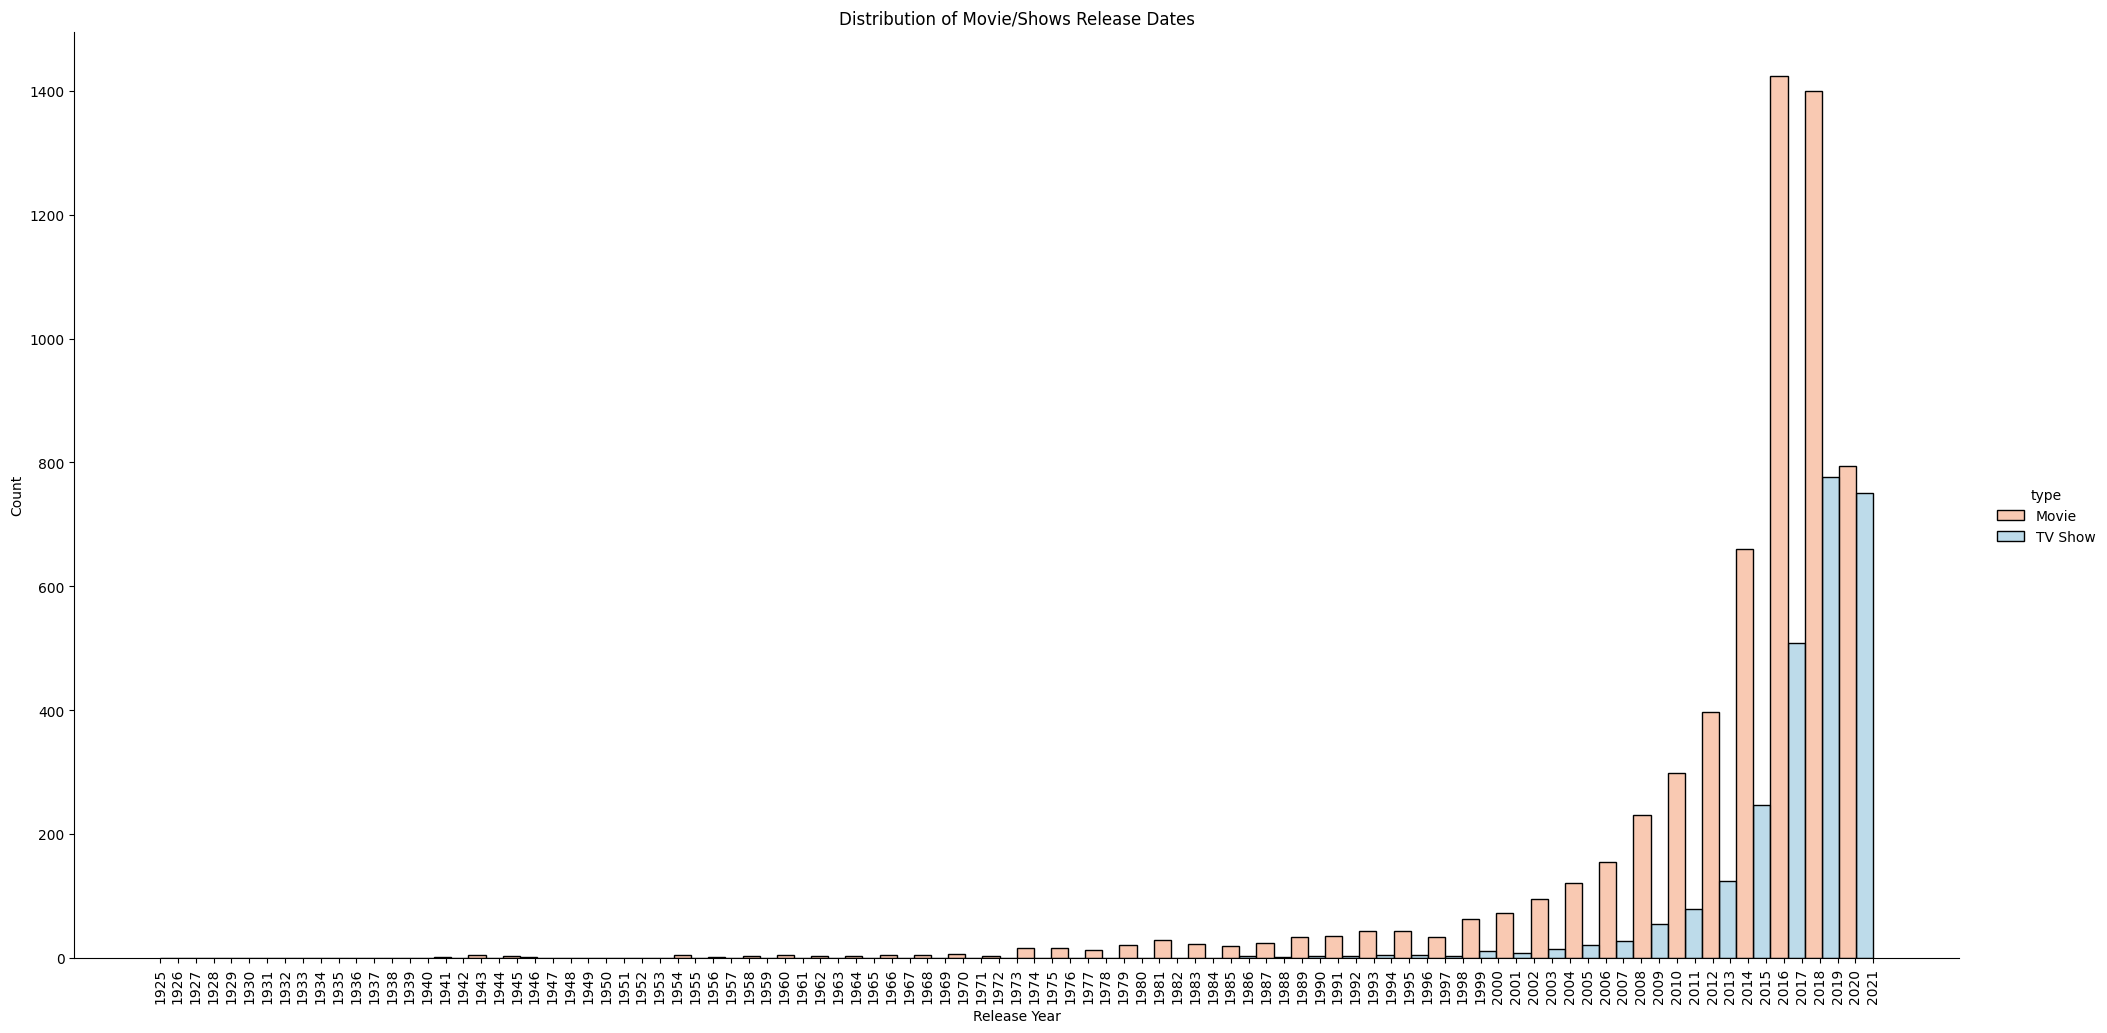

In [111]:

plt.figure(figsize=(14,8))
#histogram plot
sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='RdBu')
plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
plt.title('Distribution of Movie/Shows Release Dates')
plt.xlabel('Release Year')

Following are the observations from the histogram:
1. The number of TV show and movies has increased significantly from 2008.
2. Maximum number of movies were released in 2016 and maximum number of TV shows released in 2019.
3.Between 2016 and 2020 maximum content was released to the platform.
4. There is a significant drop in the number of movies and television episodes produced after 2020.

**Chart 4**: Top 10 Genre in Movies

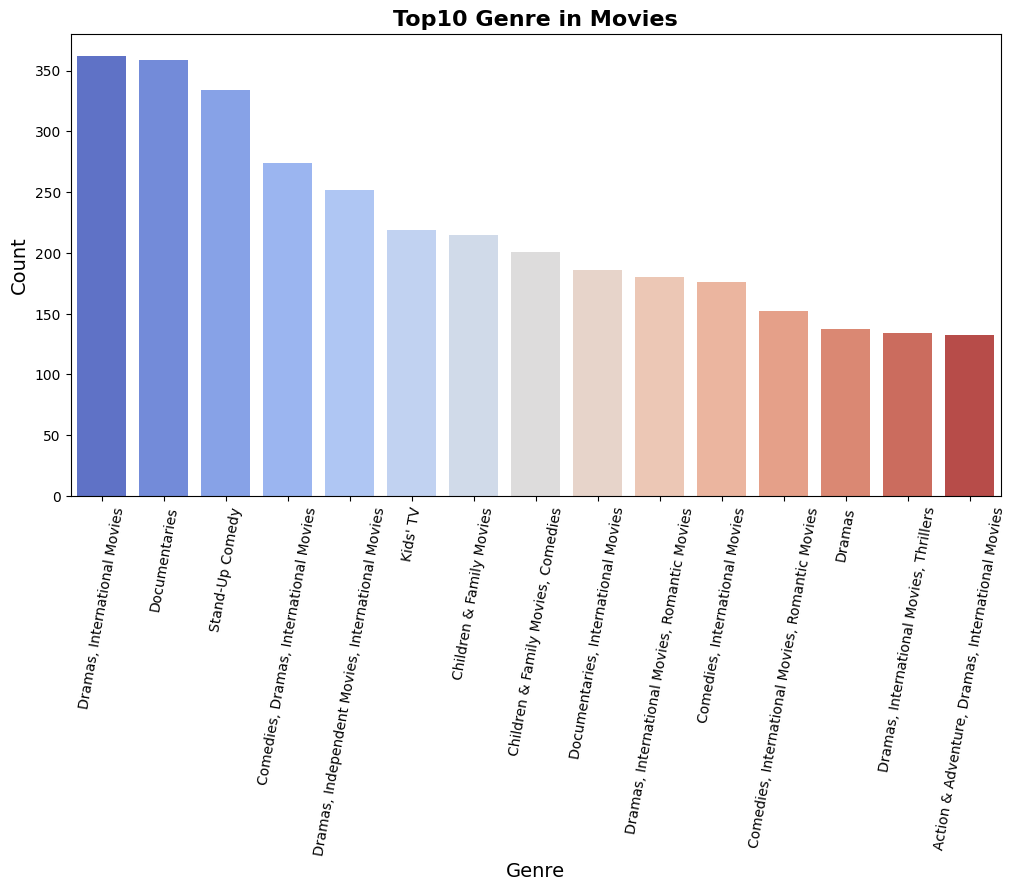

In [112]:
# Top 10 Genre in movies
plt.figure(figsize=(12,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="coolwarm")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.ylabel("Count",size='14')
plt.xlabel("Genre",size='14')
plt.show()

Above plot shows the average count of all the genres persent in the dataset. It can be seen from the plot that drama, international movies, documentaries, stand-up comedy and comedies are some of the highly popular content on the platform.

**Chart 5**: Bar chart for showing montly release of contents

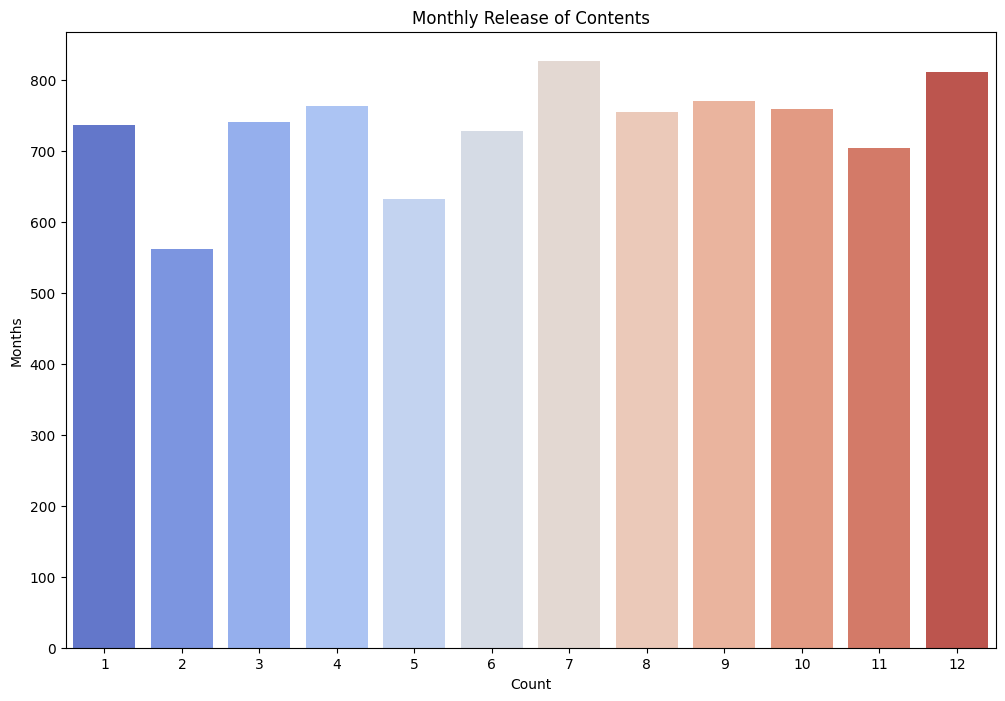

In [113]:
#adding month column
df['month'] = pd.DatetimeIndex(df['date_added']).month
# Plotting the Countplot
plt.figure(figsize=(12,8))
sns.countplot(x='month', data=df,palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Months")
plt.title("Monthly Release of Contents")
plt.show()

<Axes: xlabel='month', ylabel='count'>

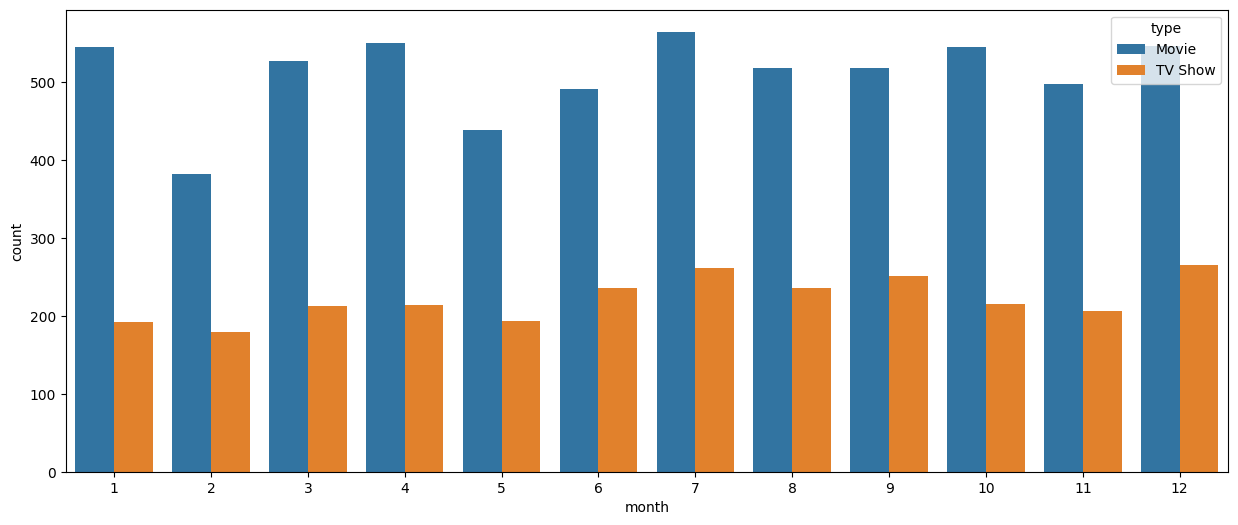

In [114]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)

From above two plots it can be concluded that maximum content was released in July followed by December.

**Chart 6**: Countries with most contents

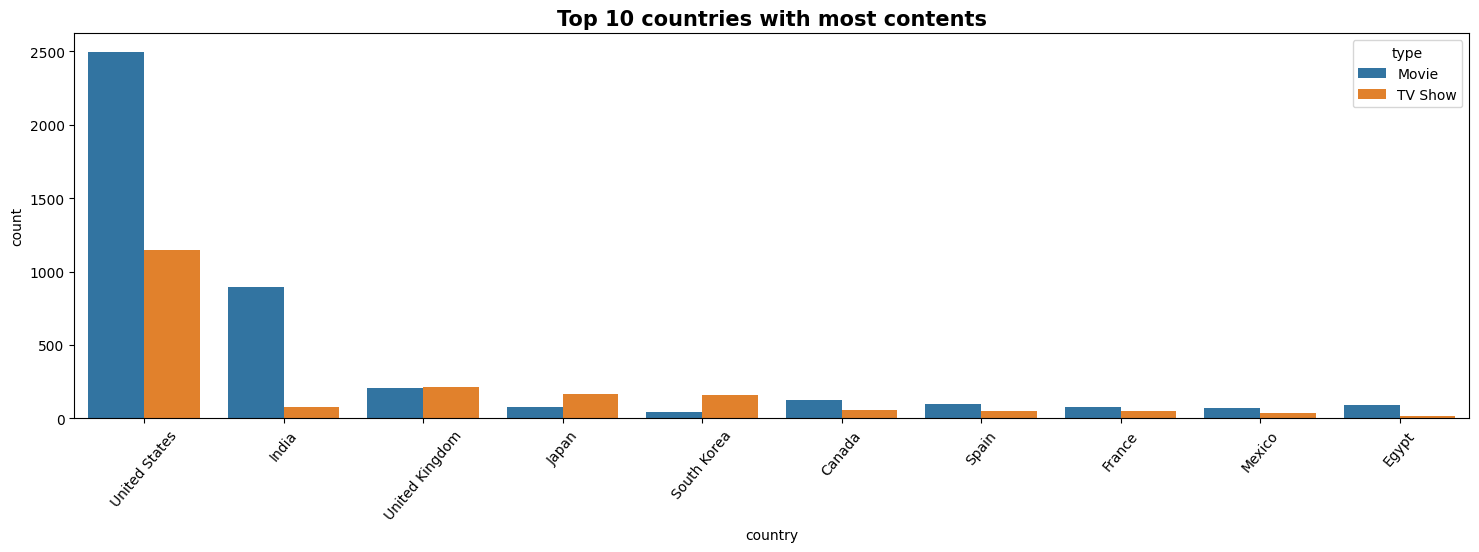

In [115]:
plt.figure(figsize=(18,5))
# plotting top 10 countires
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

It can be seen from above plot that United States has the highest content followed by India.

**Chart 7**: Histogram to show movies duration

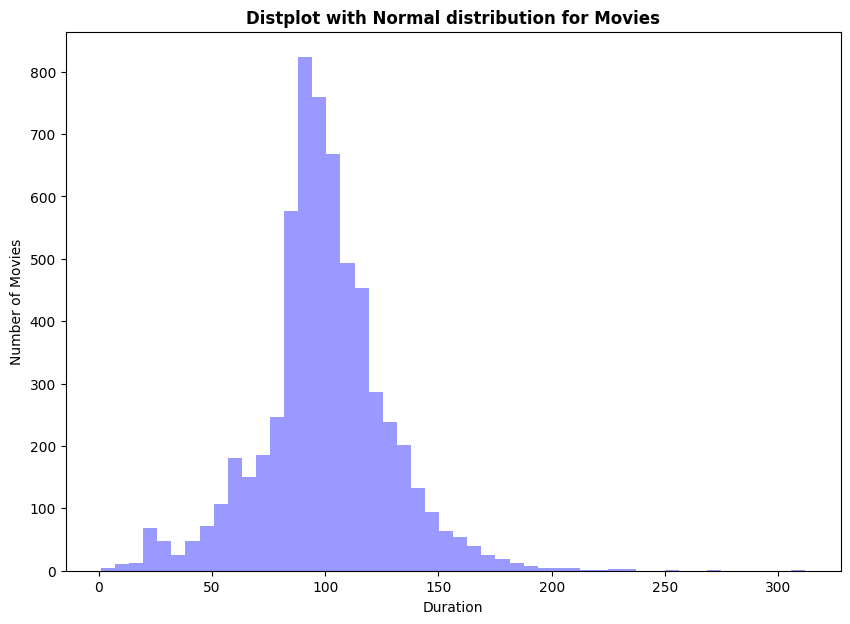

In [116]:
movies = df[df['type']=='Movie']
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Normal distribution for Movies',fontweight="bold")
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()


Most of the movies has duration between 50 and 150 minutes.

**Chart 8**: Word cloud plot to visualize the most frequently occurring words or terms in the given dataset

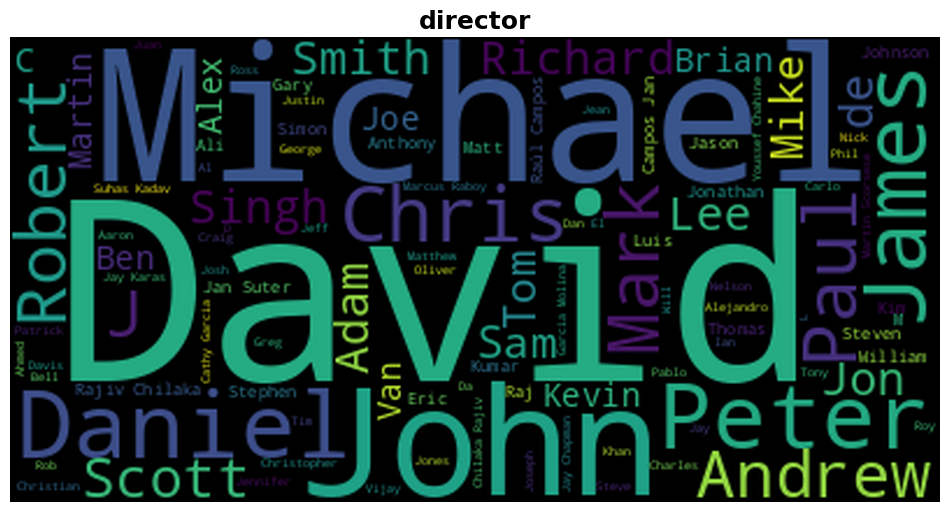

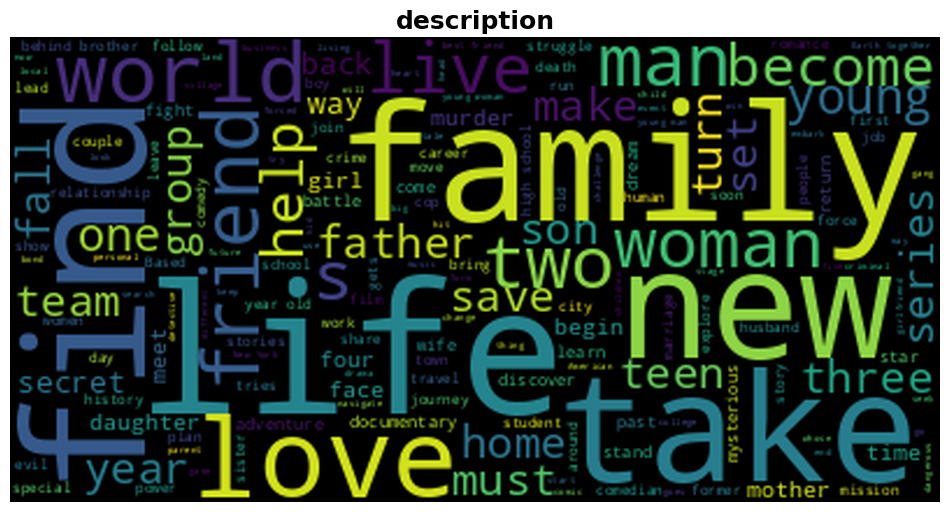

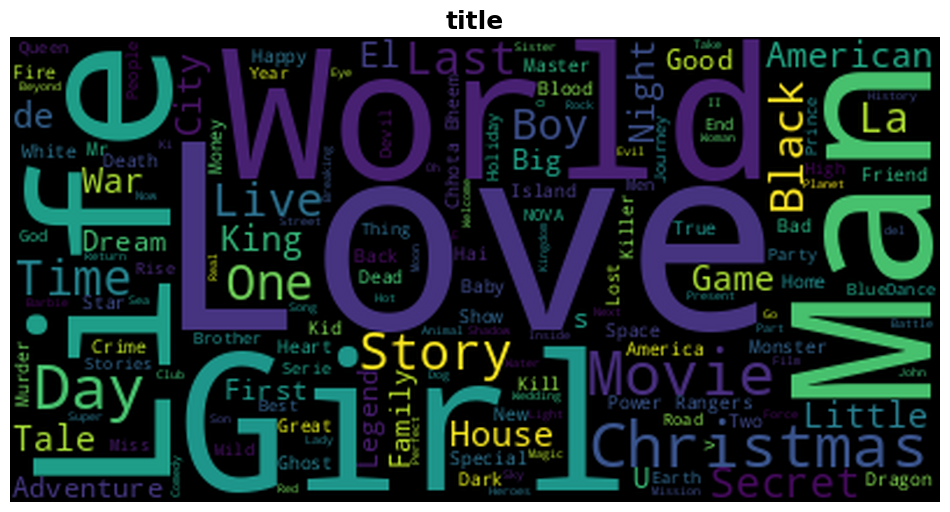

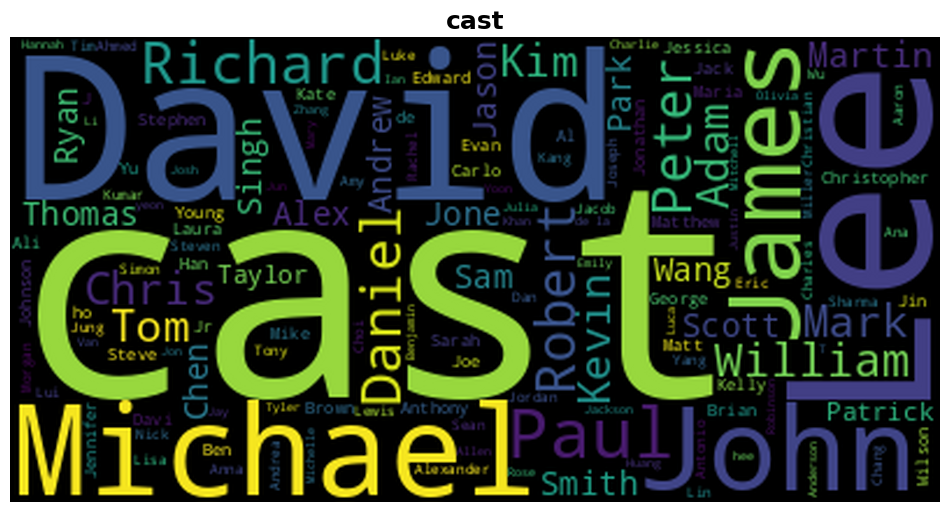

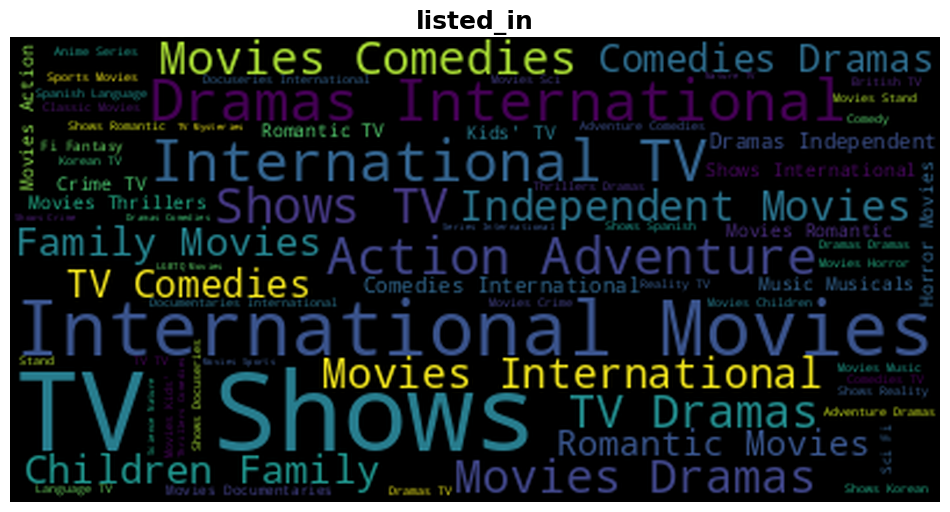

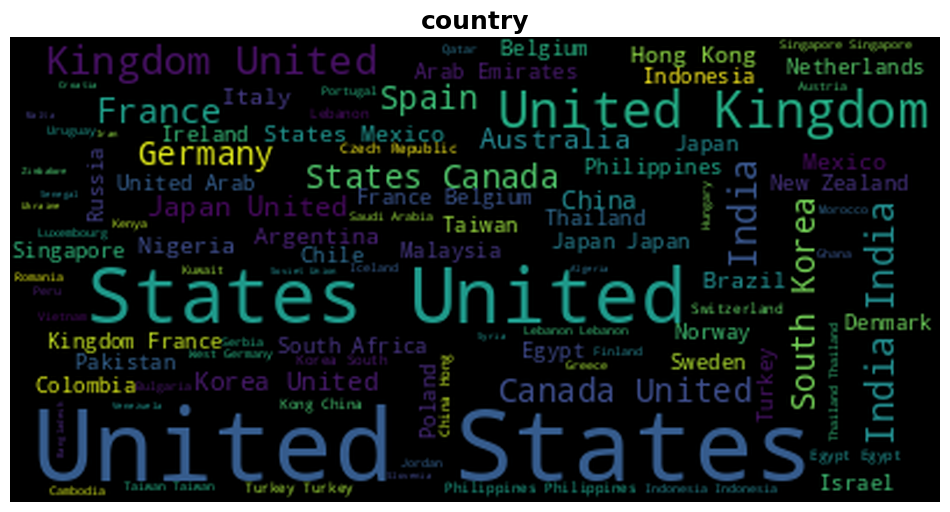

In [117]:
features_for_wordplot = ['director', 'description', 'title', 'cast', 'listed_in', 'country']
for i in features_for_wordplot:

  df_word_cloud = df[i]
  text = " ".join(word for word in df_word_cloud)
  # Create stopword list:
  stopwords = set(STOPWORDS)        #stopwords set is used to remove these common words from the text before generating the word cloud.
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation='blackman')
  plt.axis("off")
  plt.title(i, fontsize=18, fontweight='bold')
  plt.show()

From the above word clout plots following inferences can be derived:

*   In director, the most frequent director names are David, Michael, Johns, Daniel, Paul.
*   In the description, the most frequently used words are “find,” “love,” “life,” “live,” “man,” “woman,” “battle,” “help,” “friend,” etc., which suggests that movies often center around themes of relationships, personal growth, and overcoming obstacles.

*   In cast, the most frequent actors' names are Michael, James, David, John, Paul, etc.
*   In listed_in, the most frequent genres are international movies, dramas, action, adventure, international movies, etc.

*   In country, the most frequent names are the US, India, UK, Japan, Germany, Canada, etc.







# **Hypothesis Testing**

Hypothesis testing is a statistical method used to determine if there is enough evidence to support or reject a specific claim or hypothesis about a population based on sample data.

# **Hypothetical Statement - 1**


*   H0:Movies rated for kids and older kids are at least two hours long.
*   H1:Movies rated for kids and older kids are not at least two hours long.



In [118]:
movies = df[df['type']=='Movie']
movies

show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                               No cast   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date_added  \
0                                         United States  September 25, 2021   
6                                         United States  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
9                                         United States  September 24, 2021   
12                              Germany, Czech Republic  September 23, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                       

In [119]:
#making copy of df
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water                    
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans                    
4      s5  TV Show           Kota Factory                    

                                                cast        country  \
0                                            No cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                            No cast  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  month  
0  As her father nears the end of his life, filmm...      9  
1  After crossing paths at a party, a Cape Town t...      9  
2  To protect his family from a powerful drug lor...      9  
3  Feuds, flirtations and toilet talk go down amo...      9  
4  In a city of coaching centers known to train I...      9

In [120]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [121]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids', '74 min', '84 min',
       '66 min'], dtype=object)

In [122]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   
7      s8  Movie                           Sankofa   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   

                                                cast  \
0                                            No cast   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
6                                      United States  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   

   release_year rating  duration  \
0          2020  PG-13        90   
6          2021     PG        91   
7          1993  TV-MA       125   

                                          listed_in  \
0                                     Documentaries   
6                          Children & Family Movies   
7  Dramas, Independent Movies, International Movies   

                                         description  month target_ages  
0  As her father nears the end of his life, filmm...      9       Teens  
6  Equestria's divided. But a bright-eyed hero be...      9  Older Kids  
7  On a photo shoot in Ghana, an American model s...      9      Adults

In [123]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   67.255034
1  Older Kids   91.640577
2       Teens  109.789776
3      Adults   98.831633

In [124]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A['duration'].mean()
S1 = A['duration'].std()

M2= B['duration'].mean()
S2 =B['duration'].std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids 67.25503355704699 
 Mean for  movies rated for older kids 91.64057672502575
Std for  movies rated for Older Kids 30.514447503947505 
 Std for  movies rated for kids 33.74546321669491


In [125]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602338733274751

In [126]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602338733274747

The t-value is not in the range, hence the null hypothesis is rejected.

Therefore, movies rated for kids and older kids are not at least two hours long.

# **Hypothetical Statement - 2**


*   H0:The duration which is more than 90 mins are movies.
*   H1:The duration which is more than 90 mins are NOT movies.



In [127]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water                    
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans                    
4      s5  TV Show           Kota Factory                    

                                                cast        country  \
0                                            No cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                            No cast  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  month  
0  As her father nears the end of his life, filmm...      9  
1  After crossing paths at a party, a Cape Town t...      9  
2  To protect his family from a powerful drug lor...      9  
3  Feuds, flirtations and toilet talk go down amo...      9  
4  In a city of coaching centers known to train I...      9

In [128]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [129]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water                    
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                            No cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   

           date_added  release_year rating  duration  \
0  September 25, 2021          2020  PG-13        90   
1  September 24, 2021          2021  TV-MA         2   
2  September 24, 2021          2021  TV-MA         1   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  month  
0  As her father nears the end of his life, filmm...      9  
1  After crossing paths at a party, a Cape Town t...      9  
2  To protect his family from a powerful drug lor...      9

In [130]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

type   duration
0    Movie  99.536629
1  TV Show   1.751877

In [131]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A['duration'].mean()
S1 = A['duration'].std()

M2= B['duration'].mean()
S2 = B['duration'].std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  99.53662914015337
Std  1.5506216717055206


In [132]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val)

6129 2664
dof 8791
SP_2 = 245.31886097420778
SP 15.662658170764239
tvalue 269.02897339174007


In [133]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602338733274751

In [134]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602338733274747

The t-value is not in the range, hence the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies.

# **Feature Engineering**

In this section will transform the data set into meaningful features that can be used to train machine learning models for clustering. Basically will be doing Textual Data Preprocessing and Vectorization. In summary textual data will be converted to numbers.

In [135]:
# importing libraries for language processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [136]:
df['description'].astype(str)

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8793, dtype: object

In [137]:
# making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [138]:
# converting text to string
df['description']= df['description'].apply(lambda x: " ".join(x))
# converting to lower case
df['description']= df['description'].apply(lambda x: x.lower())

In [139]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [140]:
df['description'][0:10]

0    as her father nears the end of his life filmma...
1    after crossing paths at a party a cape town te...
2    to protect his family from a powerful drug lor...
3    feuds flirtations and toilet talk go down amon...
4    in a city of coaching centers known to train i...
5    the arrival of a charismatic young priest brin...
6    equestrias divided but a brighteyed hero belie...
7    on a photo shoot in ghana an american model sl...
8    a talented batch of amateur bakers face off in...
9    a woman adjusting to life after a loss contend...
Name: description, dtype: object

In [141]:
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

'father nears end life filmmaker kirsten johnson stages death inventive comical ways help face inevitable'

In [142]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [143]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=20000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(8793, 20000)

In [144]:
# convert X into array form for clustering
X = X_tfidf.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Finally, I have converted all the textual data into numbers.

# **Dimensionality Reduction**

 In this section will perform dimensionality reduction using Principal Component Analysis because the data has so many features. We need to reduce the number of features while capturing the maximum variance so that there is less information loss and most of the information is covered by those fewer features.

Dimensionality reduction aims to keep as much useful information as possible while eliminating redundant or irrelevant features that may hamper model performance.

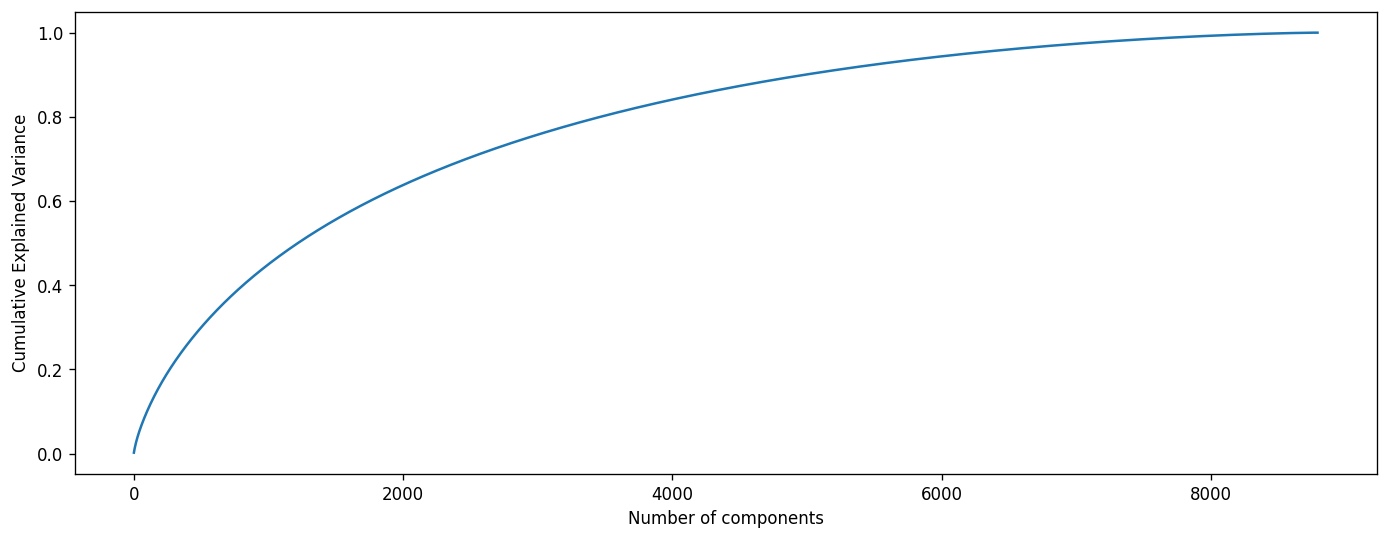

In [145]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


*   It can be seen from above plot that 7000 components can explain almost 95% of the variance.

*  Since choosing 7000 could be tricky, I will set the value to 95% in sklearn, for automatically capturing 95% of the variance. This will select those components only.

In [146]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

(8793, 6180)

After tuning my PCA, the shape will be (8793, 6180), indicating that we now have 8793 observations and 6180 features as opposed to 20,000 features previously. It indicates that we have caught the maximum variance of the data set with 6180 features only.

# **Clustering Analysis (Unsupervised ML)**

Now it’s time to apply clustering to the dataset. Clustering is a technique where we group the data points so that data points in the same group are more similar to each other than those in other groups.

Clustering groups similar data points based on their features or attributes.

In this project, we will apply two clustering algorithms to the data:


*   K Means Clustering
*   Agglomerative Clustering






**K Means Clustering**

K Means Clustering is an unsupervised machine learning algorithm often used to find patterns or groups in the data.

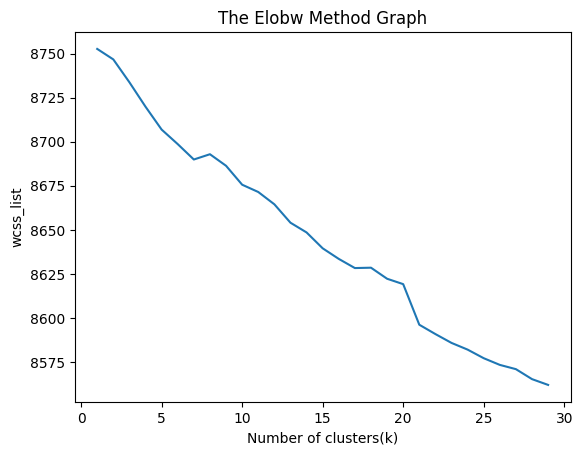

In [147]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [148]:
from sklearn.metrics import silhouette_score
#silhouette score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t silhouette: %0.4f'%(i,score))

cluster: 2 	 silhouette: 0.0004
cluster: 3 	 silhouette: 0.0008
cluster: 4 	 silhouette: 0.0009
cluster: 5 	 silhouette: 0.0014
cluster: 6 	 silhouette: 0.0018
cluster: 7 	 silhouette: 0.0020
cluster: 8 	 silhouette: 0.0014
cluster: 9 	 silhouette: 0.0016
cluster: 10 	 silhouette: 0.0020
cluster: 11 	 silhouette: 0.0023
cluster: 12 	 silhouette: 0.0025
cluster: 13 	 silhouette: 0.0029
cluster: 14 	 silhouette: 0.0029
cluster: 15 	 silhouette: 0.0031
cluster: 16 	 silhouette: 0.0034
cluster: 17 	 silhouette: 0.0035
cluster: 18 	 silhouette: 0.0038
cluster: 19 	 silhouette: 0.0038
cluster: 20 	 silhouette: 0.0042
cluster: 21 	 silhouette: 0.0041
cluster: 22 	 silhouette: 0.0041
cluster: 23 	 silhouette: 0.0043
cluster: 24 	 silhouette: 0.0044
cluster: 25 	 silhouette: 0.0047
cluster: 26 	 silhouette: 0.0048
cluster: 27 	 silhouette: 0.0051
cluster: 28 	 silhouette: 0.0050
cluster: 29 	 silhouette: 0.0048


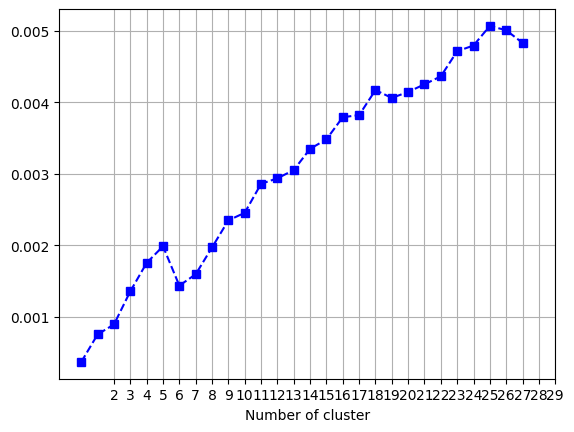

In [149]:
#Plotting silhouette's score
plt.plot(sill,'bs--')
plt.xticks(list(range(2,30)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

From elbow and silhouette score it can be concluded that 27 clusters are formed.

In [150]:
#training the K-means model
kmeans = KMeans(n_clusters= 27, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

**Evaluation**

In [152]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.004705253632176


Silhouette score is 0.004705253632176

In [153]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

11.468374680470008

In [154]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [155]:
df['cluster'].value_counts()

cluster
7     2728
8      410
22     391
18     348
4      306
17     289
12     284
25     282
14     275
9      275
15     262
6      251
10     238
23     235
26     228
13     214
3      214
24     192
16     188
20     180
11     179
0      174
2      159
21     156
19     131
1      103
5      101
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

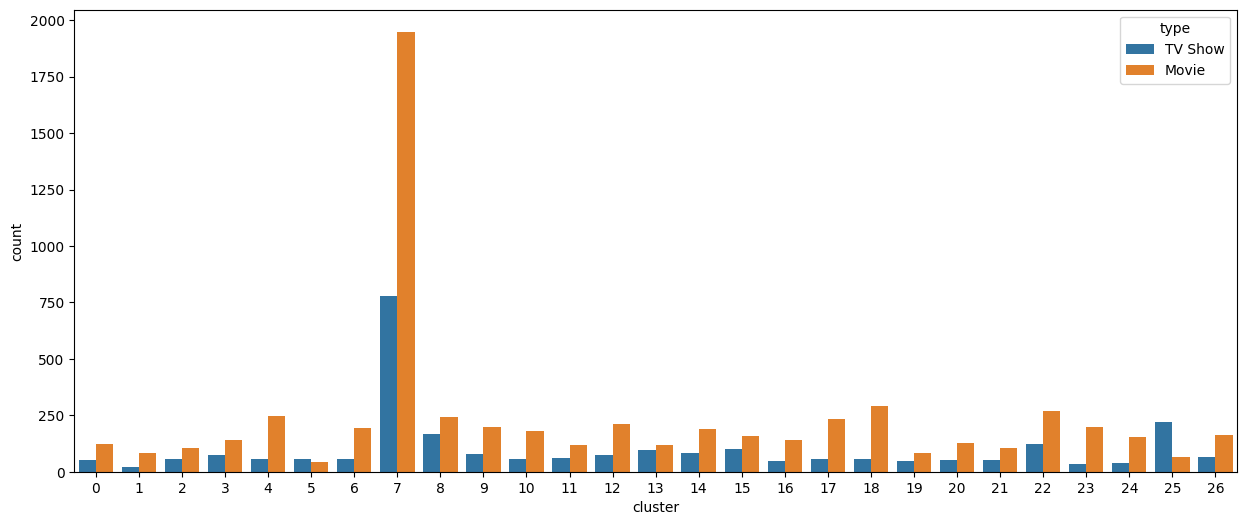

In [156]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

Cluster 7 has the highest number of data points.

In [157]:
#scatter plot for cluster
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

**Dendogram**

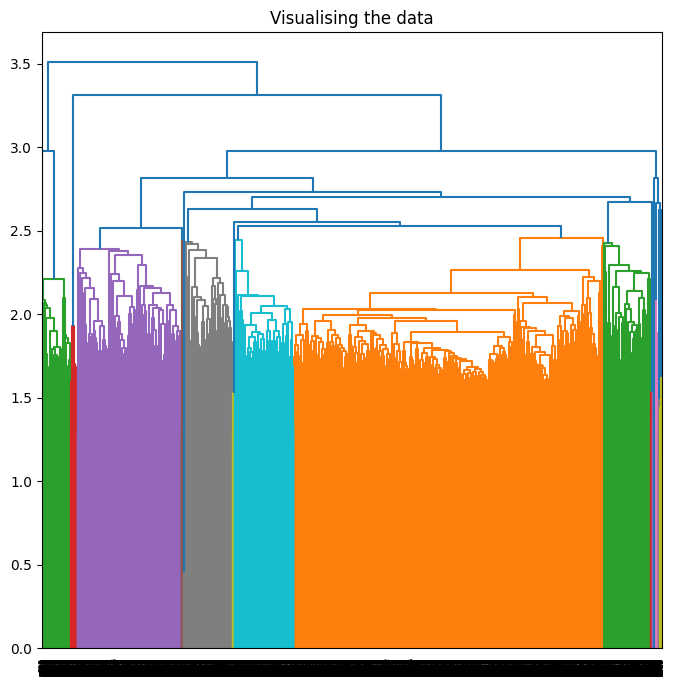

In [158]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

**Agglomerative Clustering**

In [160]:
#fitting the variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [161]:
df_hierarchical =df.copy()
#adding a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water                    
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans                    
4      s5  TV Show           Kota Factory                    

                                                cast        country  \
0                                            No cast  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                            No cast  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  month  cluster  
0  father nears end life filmmaker kirsten johnso...      9        0  
1  crossing paths party cape town teen sets prove...      9        0  
2  protect family powerful drug lord skilled thie...      9        0  
3  feuds flirtations toilet talk go among incarce...      9        0  
4  city coaching centers known train india’s fine...      9        0

**Evaluation**

In [162]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [163]:
#davies_bouldin_score of the clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

8.628010135096984

# **Conclusions**



1. There are more number of Movie show than TV show. Roughly Movie shows are twice than TV show.
2. Most of the rated content on Netflix falls into the TV-MA and TV-14 categories.
3. The high share of TV-MA and TV-14-rated content suggests a significant audience for mature and teen-oriented content.
4. The number of TV show and movies has increased significantly from 2008.
5. Maximum number of movies were released in 2016 and maximum number of TV shows released in 2019.
6. Between 2016 and 2020 maximum content was released to the platform.
7. There is a significant drop in the number of movies and television episodes produced after 2020.
8. Drama, international movies, documentaries, stand-up comedy and comedies are some of the highly popular content on the platform.
9. Maximum content was released in July followed by December.
10. United States has the highest content followed by India.
11. Most of the movies has duration between 50 and 150 minutes.
12. The most frequent movie makiing director names are David, Michael, Johns, Daniel, Paul.
13. The most frequently words used in the content are “find,” “love,” “life,” “live,” “man,” “woman,” “battle,” “help,” “friend,” etc., which suggests that movies often center around themes of relationships, personal growth, and overcoming obstacles.
14. The most frequent actors' names are Michael, James, David, John, Paul, etc.
15. The most frequent listed genres are international movies, dramas, action, adventure, international movies, etc.
16. The most frequently used names of countries in the content are the USA, India, UK, Japan, Germany, Canada, etc.
17. From dimension reduction point of view its the 7000 components that can explain almost 95% of the  in the data set.
18. From elbow and silhouette score it can be concluded that 27 clusters are formed.
19. Cluster 7 has the highest number of data points.
20. Evaluation matrix shows that K Means is more suitable for identification than Hierarchical.The cluster 7 has the highest number of datapoints and for other cluster data points are evenly distributed.